# Texas COVID-19 data explorer

## Data sources
Primary data sources include the following.

### Texas Department of State Health Services
- Data over time per county: cases, fatalities, estimated active cases, cumulative tests
- COVID-19 hospitalizations and hospital capacity by Trauma Service Area (TSA)
- https://dshs.texas.gov/coronavirus/additionaldata.aspx

### New York Times data collection
- U.S. data, state-level data, and county level data
- cumulative datas, cases, and deaths
- https://github.com/nytimes/covid-19-data

Right now we will use static datasets. Perhaps at a later time we will pull current data directly from the web. Data was pulled on 2020-07-12 from Texas Department of State and Health Services. 

In [81]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

# update plot defaults:
plt.rcParams.update(
    {"font.size": 16, 
     "figure.figsize": (10,6),
    "lines.linewidth": 3})

## Testing data

In [82]:
# testing data:
testing_fi = "data/Cumulative Tests over Time by County.xlsx"
testdf = pd.read_excel(testing_fi, index_col=[0], skiprows=[0], nrows=254)

# massage testing data columns:
# Also, change the column strings to datetime, or Pandas timestamp,
# objects. The columns can still be accessed usings strings though.
stripped_columns = [x.split("Through ")[-1] for x in testdf.columns]
stripped_columns = ["%s 2020" %x for x in stripped_columns]
stripped_columns = [x.replace("*", "") for x in stripped_columns]
stripped_columns = [datetime.strptime(x, "%B %d %Y") for x in stripped_columns]
testdf.columns = stripped_columns

# some of the columns have "--" to signify corrupt or missing 
# data; let's change these to nan values:
nan_characters = ["--", "-"]
for char in nan_characters:
    testdf = testdf.replace(char, np.nan)

# extract top five testing counties:
top5 = testdf.loc[:, testdf.columns[-1]]
top5 = top5.sort_values(ascending=False).iloc[:5]
top5 = testdf.loc[top5.index, :]

<IPython.core.display.Javascript object>


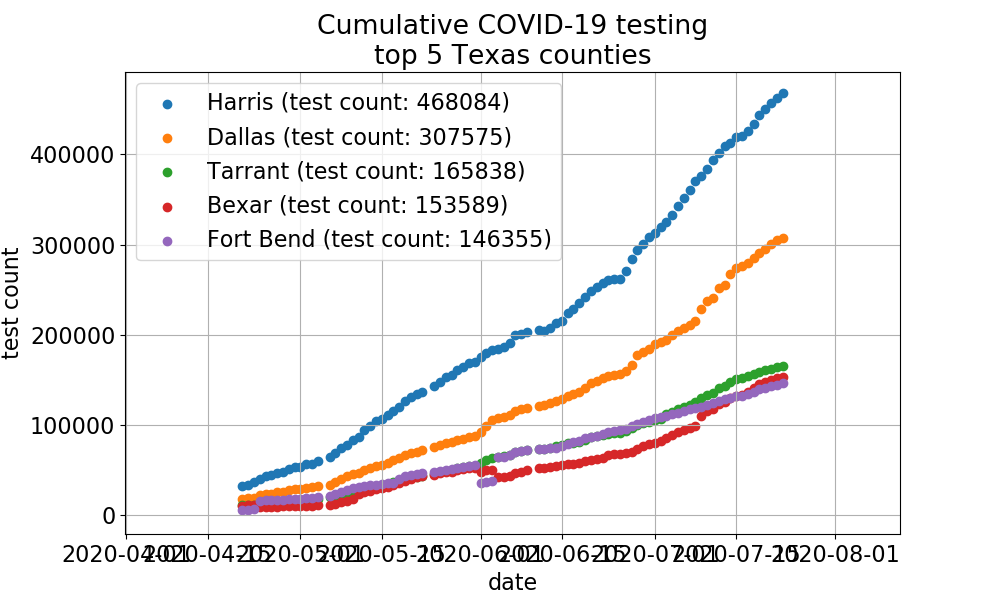

In [83]:
# Plot testing data in Harris county:
plt.figure()
plt.title("Cumulative COVID-19 testing\ntop 5 Texas counties")
for county in top5.index:
    label="%s (test count: %d)" %(county, top5.loc[county].iloc[-1])
    plt.scatter(testdf.columns, testdf.loc[county, :], label=label)
plt.legend()
plt.xlabel("date")
plt.ylabel("test count")
plt.grid()

## Cases data

In [84]:
cases_fi = "data/Texas COVID-19 Case Count Data by County.xlsx"
casedf = pd.read_excel(cases_fi, index_col=[0], skiprows=[0,1], nrows=254)

# massage column names:
stripped_columns = [x.split("\n")[-1] for x in casedf.columns]
stripped_columns = [x.split("Cases")[-1] for x in stripped_columns]
stripped_columns = [x.replace(" ", "") for x in stripped_columns]
stripped_columns = [x.replace("*", "") for x in stripped_columns]
new_cols = []
for col in stripped_columns:
    if col == "Population":
        new_cols.append(col)
    else:
        col = "%s 2020" %col
        col = datetime.strptime(col, "%m-%d %Y")
        new_cols.append(col.strftime("%Y-%m-%d"))
casedf.columns = new_cols

# remove Population column:
county_population = casedf.loc[:, "Population"]
casedf = casedf.drop(columns=["Population"])

# extract top five counties with most cases:
top5cases = casedf.loc[:, casedf.columns[-1]]
top5cases = top5cases.sort_values(ascending=False).iloc[:5]
top5cases = casedf.loc[top5cases.index, :]

### Raw number of cases

<IPython.core.display.Javascript object>


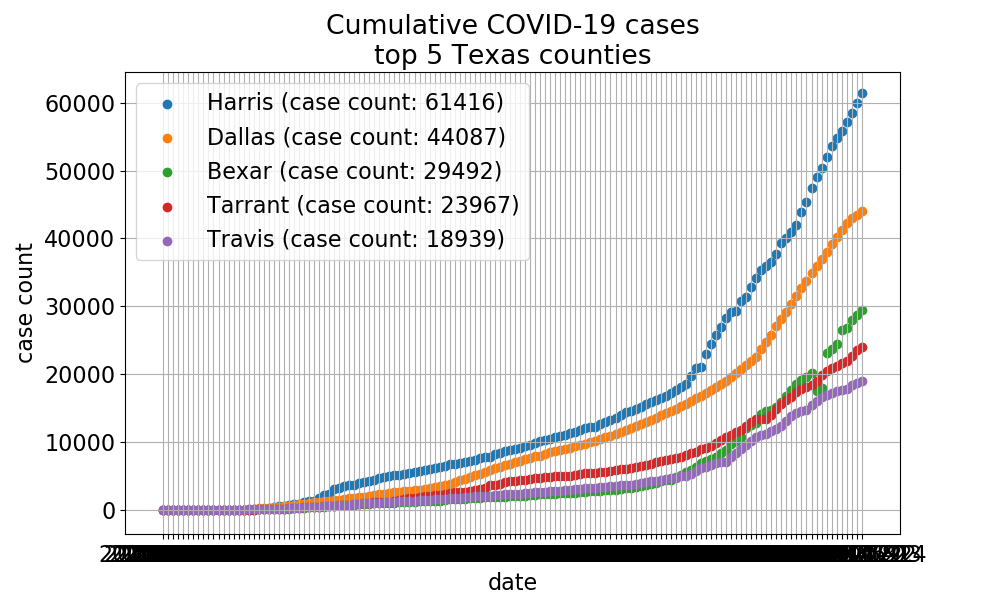

In [85]:
# plot data:
plt.figure()
plt.title("Cumulative COVID-19 cases\ntop 5 Texas counties")
for county in top5cases.index:
    label="%s (case count: %d)" %(county, top5cases.loc[county].iloc[-1])
    plt.scatter(casedf.columns, casedf.loc[county, :], label=label)
plt.legend()
plt.xlabel("date")
plt.ylabel("case count")
plt.grid()

### Number of cases divided by county population

<IPython.core.display.Javascript object>


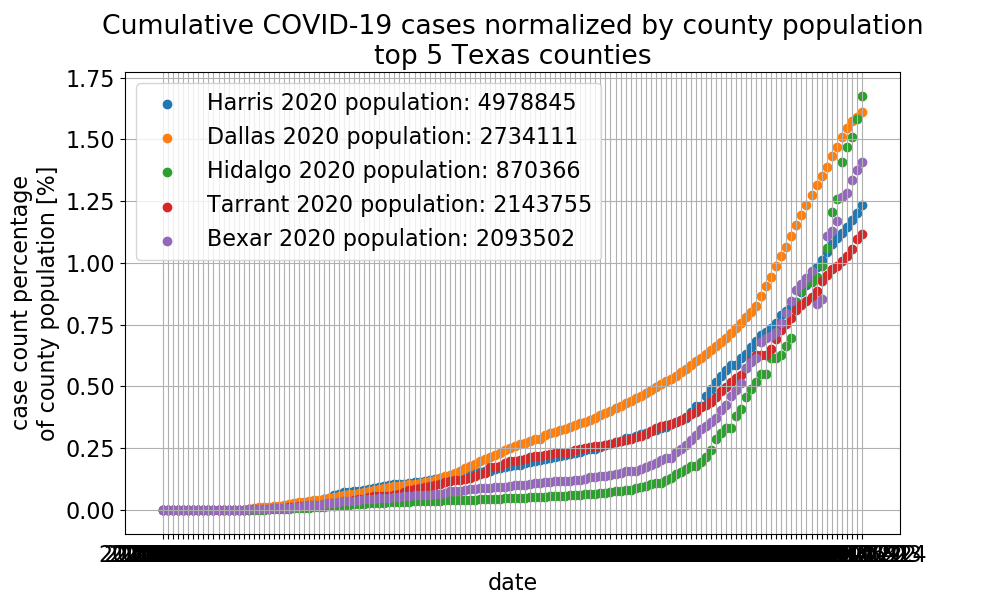

In [94]:
# plot data:
plt.figure()
plt.title("Cumulative COVID-19 cases normalized by county population\ntop 5 Texas counties")
for county in top5cases.index:
    label="%s 2020 population: %d" %(county, county_population.loc[county])
    plt.scatter(casedf.columns, 100*casedf.loc[county, :]/county_population.loc[county], label=label)
plt.legend()
plt.xlabel("date")
plt.ylabel("case count percentage\nof county population [%]")
plt.grid()

## Deaths data

In [87]:
deaths_fi = "data/Texas COVID-19 Fatality Count Data by County.xlsx"
deathdf = pd.read_excel(
    deaths_fi, 
    index_col=[0],
    skiprows=[0,1],
    na_values=".")

# remove metadata rows, or empty rows:
deathdf = deathdf.dropna(axis=0, how="all")

# correct column names:
stripped_columns = [x.replace("Fatalities", "") for x in deathdf.columns]
stripped_columns = [x.replace(" ", "") for x in stripped_columns]
new_cols = []
for col in stripped_columns:
    if col == "Population":
        new_cols.append(col)
    else:
        col = "%s 2020" %col
        col = datetime.strptime(col, "%m/%d %Y")
        new_cols.append(col.strftime("%Y-%m-%d"))
deathdf.columns = new_cols

# remove Population column:
county_population = deathdf.loc[:, "Population"]
deathdf = deathdf.drop(columns=["Population"])

# extract top five counties with most cases:
not_counties = ["Total", "Counties Reporting Fatalities"]
tx_counties = [x for x in deathdf.index if x not in not_counties]
top5cases = deathdf.loc[:, deathdf.columns[-1]]
top5cases = top5cases.loc[tx_counties]
top5cases = top5cases.sort_values(ascending=False).iloc[:5]
top5cases = deathdf.loc[top5cases.index, :]

### Raw number of deaths

<IPython.core.display.Javascript object>


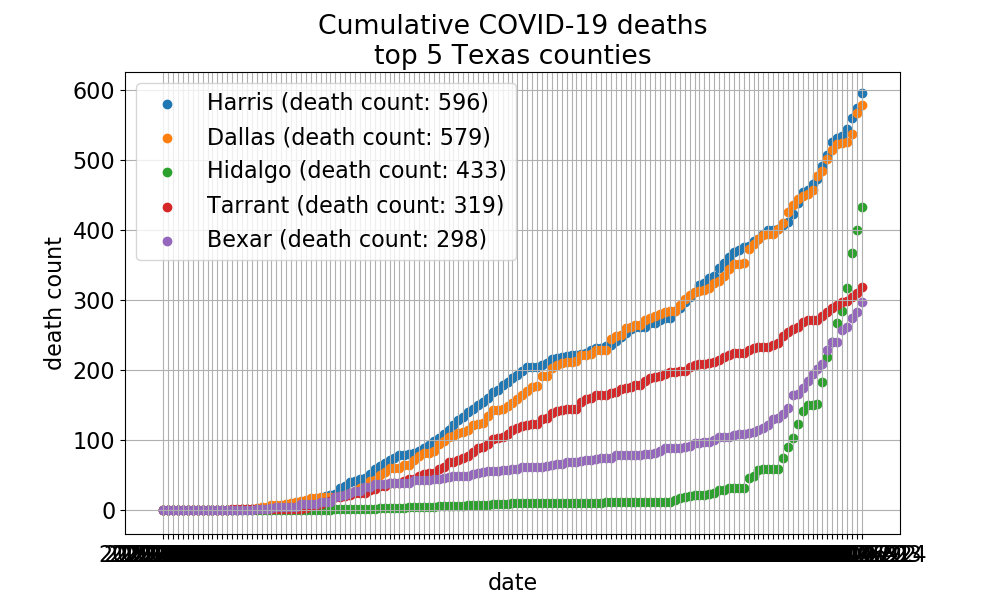

In [88]:
# plot data:
plt.figure()
plt.title("Cumulative COVID-19 deaths\ntop 5 Texas counties")
for county in top5cases.index:
    label="%s (death count: %d)" %(county, top5cases.loc[county].iloc[-1])
    plt.scatter(deathdf.columns, deathdf.loc[county, :], label=label)
plt.legend()
plt.xlabel("date")
plt.ylabel("death count")
plt.grid()

### Number of deaths divided by county population

In [89]:
county_population.loc["Harris"]

4978845.0

<IPython.core.display.Javascript object>


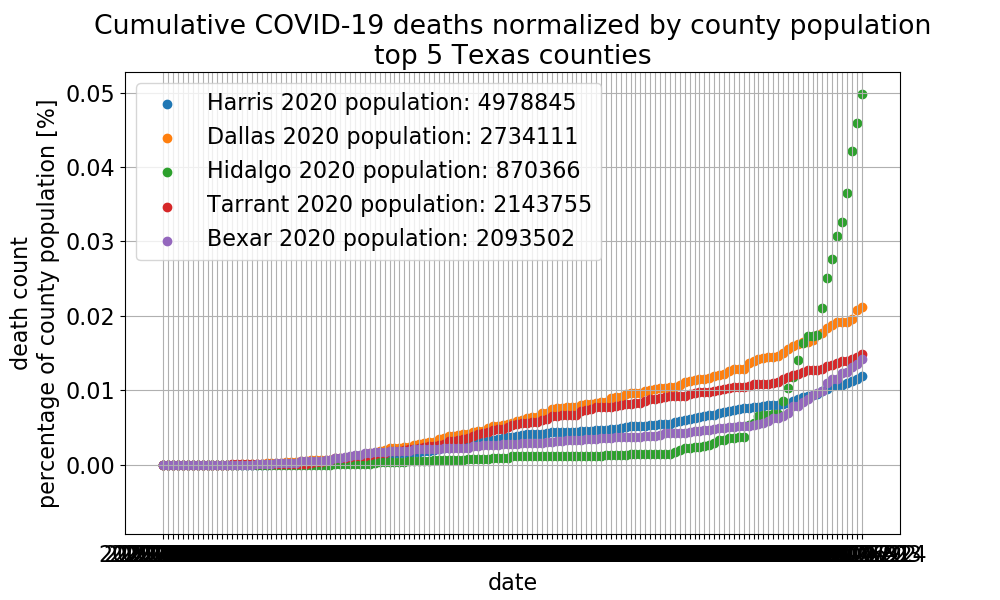

In [95]:
# plot data:
plt.figure()
plt.title("Cumulative COVID-19 deaths normalized by county population\ntop 5 Texas counties")
for county in top5cases.index:
    label="%s 2020 population: %d" %(county, county_population.loc[county])
    plt.scatter(deathdf.columns, 100*deathdf.loc[county, :]/county_population.loc[county], label=label)
plt.legend()
plt.xlabel("date")
plt.ylabel("death count\npercentage of county population [%]")
plt.grid()

## Comparing case count and death count for Harris County
I've always wondered what a dual plot look of cases and deaths per day would look like.

<IPython.core.display.Javascript object>


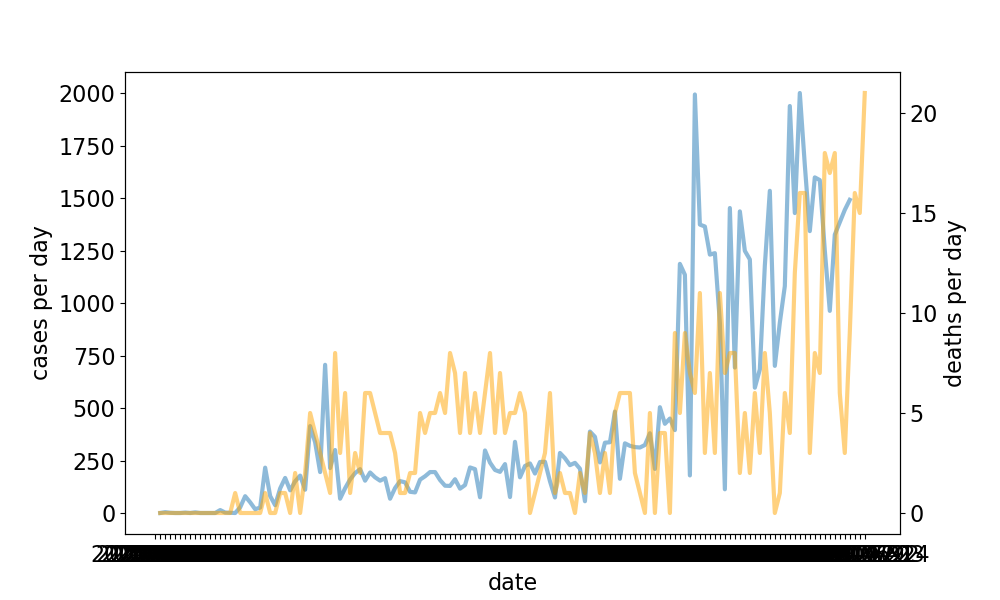

In [113]:
# First, get cases and deaths by day instead of cumulative values:
cases_per_day = casedf.diff(axis=1)
deaths_per_day = deathdf.diff(axis=1)

# example code source: https://matplotlib.org/gallery/api/two_scales.html
#
# plot with different scales:
fig, ax1 = plt.subplots()
ax1.set_xlabel("date")
ax1.set_ylabel("cases per day")
ax1.plot(cases_per_day.columns, cases_per_day.loc["Harris",:], alpha=0.5)

# create right hand side axis:
ax2 = ax1.twinx()
ax2.set_ylabel("deaths per day")
ax2.plot(deaths_per_day.columns, deaths_per_day.loc["Harris",:], alpha=0.5, color="orange")